In [1]:
!pip install keras-core
!pip install -q keras-nlp
!pip install tensorflow==2.15.*

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip freeze > requirements.txt

In [15]:
import re
from collections import defaultdict
import keras
import keras_nlp
import tensorflow as tf
import keras_core as keras
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import feature_extraction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [26]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.15.1
KerasNLP version: 0.9.3


In [7]:
df__tweet_tr = pd.read_csv('/content/drive/MyDrive/train.csv', index_col=0)
df__tweet_te = pd.read_csv('/content/drive/MyDrive/test.csv', index_col=0)


In [8]:
df__tweet_tr.head(5)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df__tweet_te.head(5)

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


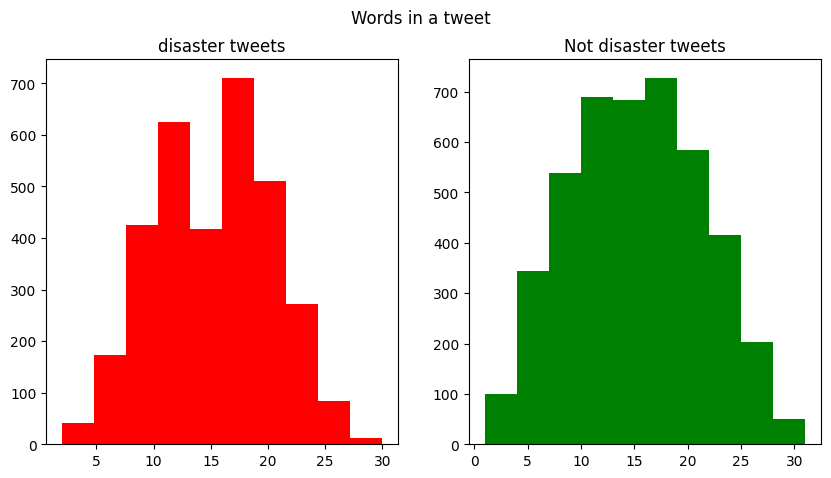

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df__tweet_tr[df__tweet_tr['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=df__tweet_tr[df__tweet_tr['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

In [10]:
BATCH_SIZE = 20
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
NUM_TRAINING_EXAMPLES = df__tweet_tr.shape[0]
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES)*TRAIN_SPLIT // BATCH_SIZE
EPOCHS = 7
AUTO = tf.data.experimental.AUTOTUNE

np.random.seed(0)
keras.utils.set_random_seed(0)

In [11]:
def dgetConfusionMatrix(y_true, y_pred, dataset):
    try:
        disp = ConfusionMatrixDisplay.from_predictions(
            y_true,
            np.argmax(y_pred, axis=1),
            display_labels=["Not Disaster","Disaster"],
            cmap=plt.cm.Blues
        )
        tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    except Exception as e:
        disp = ConfusionMatrixDisplay.from_predictions(
            y_true,
            y_pred,
            display_labels=["Not Disaster","Disaster"],
            cmap=plt.cm.Blues
        )
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + "Dataset | F1 Score: " + str(f1_score.round(2)))

In [12]:
def create_tweet_corpus(tweet, target):
    corpus=[]

    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [13]:
corpus_new = create_tweet_corpus(df__tweet_tr, 1)
len(corpus_new)

49613

<BarContainer object of 18 artists>

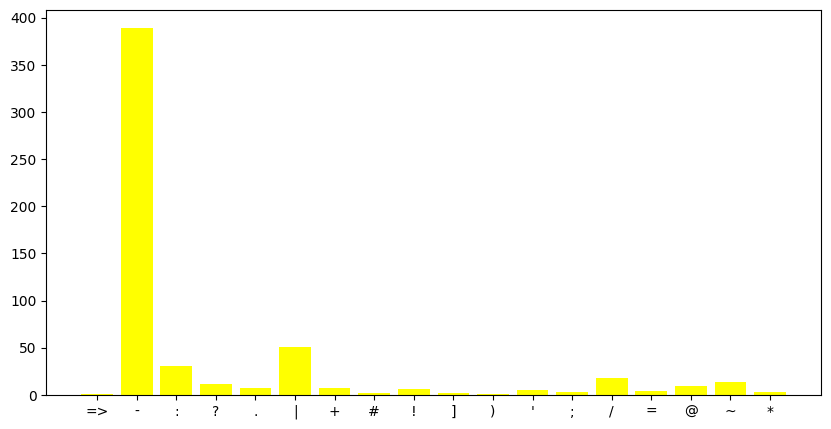

In [18]:
plt.figure(figsize=(10,5))
corpus=create_tweet_corpus(df__tweet_tr,1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y, color="yellow")

<BarContainer object of 20 artists>

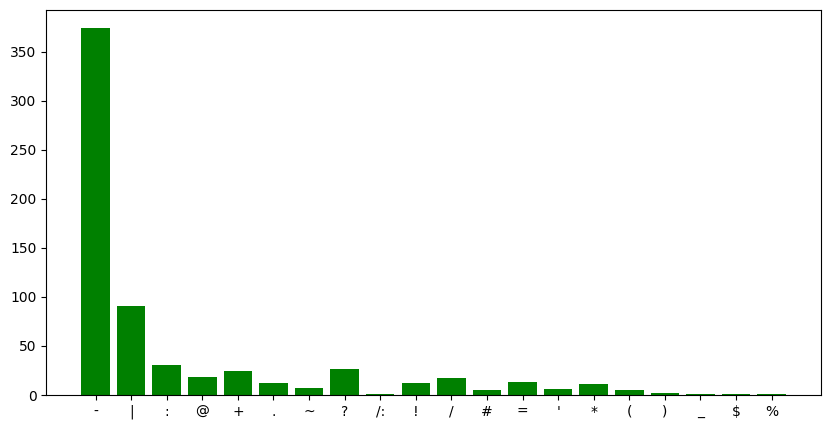

In [20]:
plt.figure(figsize=(10,5))
corpus=create_tweet_corpus(df__tweet_tr,0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='green')

<Axes: >

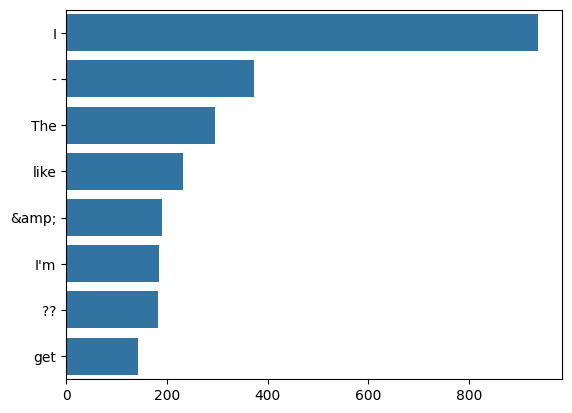

In [27]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [ ]:
df=pd.concat([tweet,test])
df.shape

In [ ]:
plt.figure(figsize=(15, 10))
word_cloud = WordCloud(max_font_size=80).generate(" ".join(corpus_new[:100]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [ ]:
count_vectorizer.fit(df__tweet_tr['text'])

In [ ]:
df__tweet_tr_embedded = count_vectorizer.transform(df__tweet_tr['text'])
df__tweet_te_embedded = count_vectorizer.transform(df__tweet_te['text'])

In [ ]:
X = df__tweet_tr["text"]
y = df__tweet_tr["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df__tweet_te["text"]

In [ ]:
X_train_embedded = count_vectorizer.transform(X_train)
X_val_embedded = count_vectorizer.transform(X_val)

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_embedded, y_train)


In [ ]:
logit.score(X_train_embedded, y_train)


In [ ]:
logit.score(X_val_embedded, y_val)


In [ ]:
y_pred_train = logit.predict(X_train_embedded)

dgetConfusionMatrix(y_train, y_pred_train, "Training Logit")

In [ ]:
y_pred_val = logit.predict(X_val_embedded)

dgetConfusionMatrix(y_val, y_pred_val, "Validation Logit")

Bert

In [ ]:
preset = "distil_bert_base_en_uncased"

preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset,
                                                                   sequence_length=160,
                                                                   name="preprocessor_4_tweets"
                                                                  )


classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor,
                                                               num_classes=2)

classifier.summary()

In [ ]:
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-5),
    metrics= ["accuracy"]
)

history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_val, y_val)
                        )

In [ ]:
history.history

In [ ]:
y_pred_train = classifier.predict(X_train)

dgetConfusionMatrix(y_train, y_pred_train, "Training")

In [ ]:
y_pred_val = classifier.predict(X_val)

dgetConfusionMatrix(y_val, y_pred_val, "Validation")